<a href="https://colab.research.google.com/github/askewai/ML_challenge/blob/main/d-11breastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### data source: UCI (doi.org/10.24432/C5HP4Z)

The Original Wisconsin Breast Cancer Database is a multivariate dataset in the health and medicine domain, designed for classification tasks with integer features. It contains 699 instances and 9 features, with data collected periodically from Dr. Wolberg’s clinical cases between January 1989 and November 1991. The dataset has undergone revisions, including the removal and modification of certain samples. It includes missing values in the "Bare Nuclei" feature and consists of various attributes such as clump thickness, uniformity of cell size and shape, and mitoses.

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.concat([X, y], axis=1)

# EDA

In [5]:
df.head(15)

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4
6,1,1,1,1,2,10.0,3,1,1,2
7,2,1,2,1,2,1.0,3,1,1,2
8,2,1,1,1,2,1.0,1,1,5,2
9,4,2,1,1,2,1.0,2,1,1,2


In [6]:
df.nunique()

,0
Clump_thickness,10
Uniformity_of_cell_size,10
Uniformity_of_cell_shape,10
Marginal_adhesion,10
Single_epithelial_cell_size,10
Bare_nuclei,10
Bland_chromatin,10
Normal_nucleoli,10
Mitoses,9
Class,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [8]:
df.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
df.isnull().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,16
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


<Figure size 1200x800 with 0 Axes>

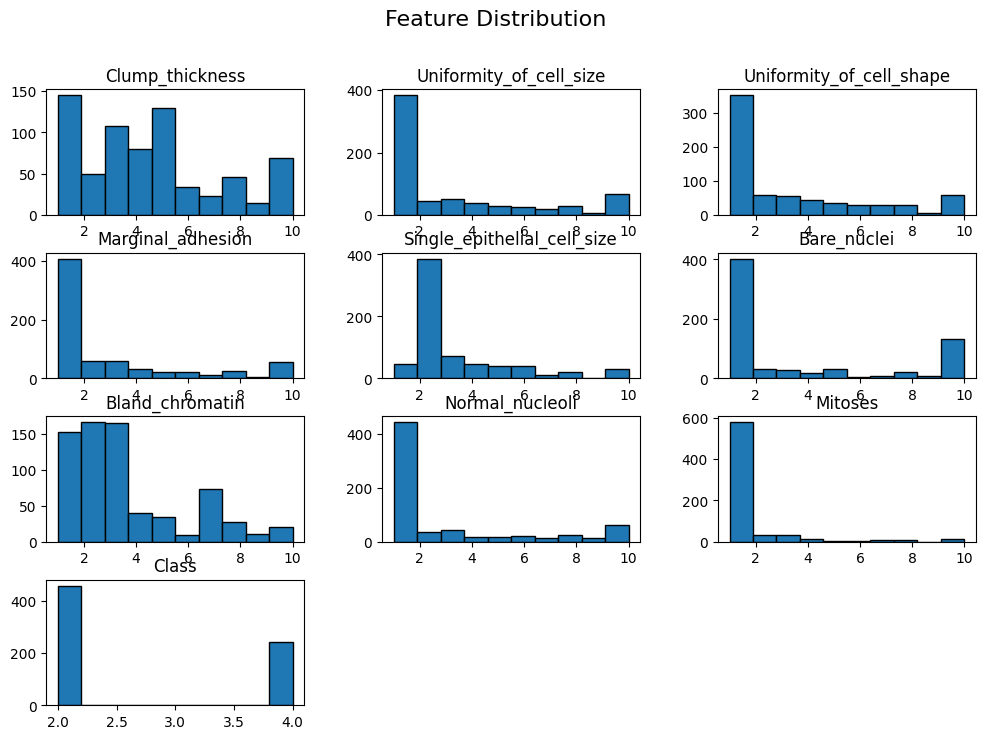

In [10]:
plt.figure(figsize=(12, 8))
df.hist(bins=10, figsize=(12, 8), grid=False, edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

<ipython-input-11-51303a637c78>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=sns.color_palette("Set2", 7))
<ipython-input-11-51303a637c78>:2: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(x='Class', data=df, palette=sns.color_palette("Set2", 7))


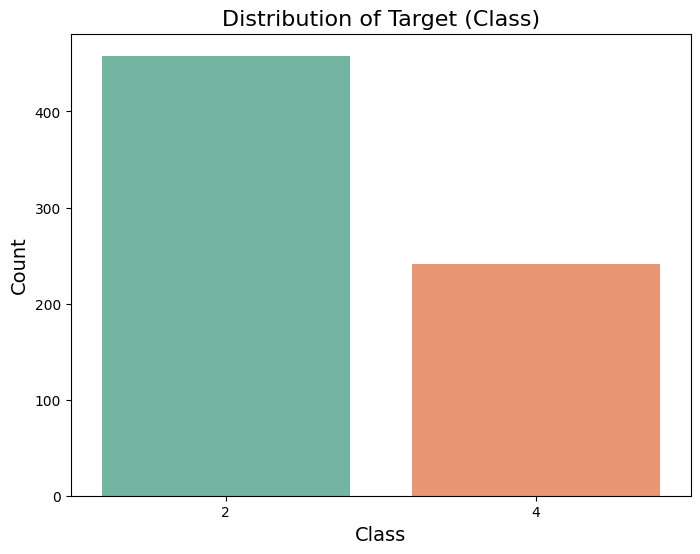

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette=sns.color_palette("Set2", 7))
plt.title('Distribution of Target (Class)', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

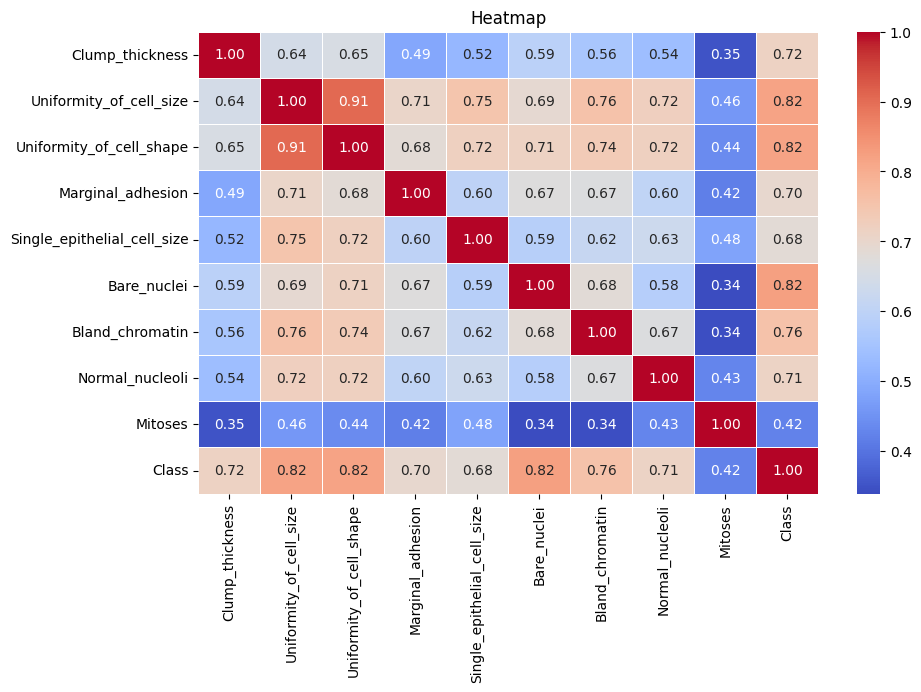

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap")
plt.show()

In [13]:
df.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

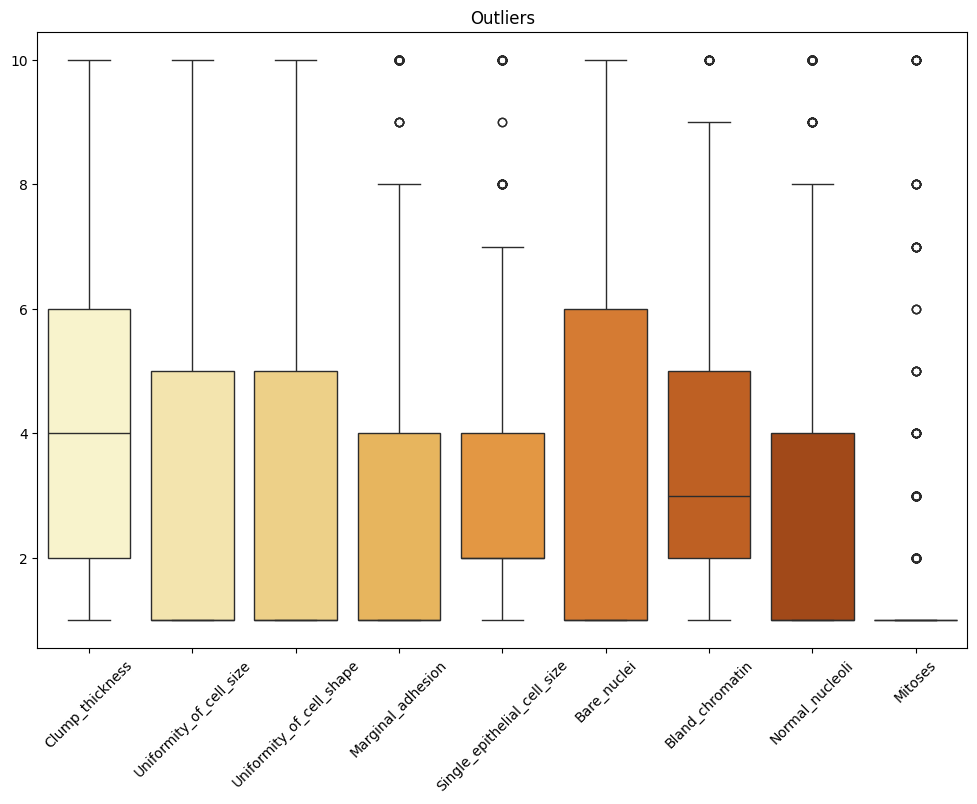

In [14]:
columns = [
    'Clump_thickness', 'Uniformity_of_cell_size', 'Uniformity_of_cell_shape',
    'Marginal_adhesion', 'Single_epithelial_cell_size', 'Bare_nuclei',
    'Bland_chromatin', 'Normal_nucleoli', 'Mitoses']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns], palette="YlOrBr")
plt.xticks(rotation=45)
plt.title("Outliers")
plt.show()

preprocessing

In [15]:
#handling missing val
df['Bare_nuclei'].fillna(df['Bare_nuclei'].median(), inplace=True)

<ipython-input-15-f24008674aae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_nuclei'].fillna(df['Bare_nuclei'].median(), inplace=True)


In [16]:
from scipy.stats.mstats import winsorize

#outliers
for col in ['Bare_nuclei', 'Bland_chromatin', 'Normal_nucleoli']:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])  # Capping 5% outliers

In [17]:
X = df.drop(columns=['Class'])
y = df[['Class']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelling

In [19]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Classifier": SVC(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors": KNeighborsClassifier()
}

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("-" * 50)

Model: Random Forest
Accuracy: 0.9643
Confusion Matrix:
[[93  2]
 [ 3 42]]
--------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.9643
Confusion Matrix:
[[93  2]
 [ 3 42]]
--------------------------------------------------
Model: Support Vector Classifier
Accuracy: 0.9714
Confusion Matrix:
[[93  2]
 [ 2 43]]
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9571
Confusion Matrix:
[[94  1]
 [ 5 40]]
--------------------------------------------------
Model: K-Neighbors
Accuracy: 0.9857
Confusion Matrix:
[[94  1]
 [ 1 44]]
--------------------------------------------------
